<a href="https://colab.research.google.com/github/yerinsally/2022ITB/blob/main/%EA%B2%BD%EC%98%81%ED%95%99%EB%B6%80_2013872_%EC%A0%95%EC%98%88%EB%A6%B0_%EB%B6%84%EB%A5%98%EA%B3%BC%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

2020년도 건강검진정보 샘플(1만건) 데이터를 이용하여 최적의 분류 모델을 만들고 평가 결과 및 도출된 인사이트를 보여주시오. 

(1) 흥미로운 분류 문제 선정: 종속/독립 변수 선택 
   - 수치 데이터를 범주형으로 변경 가능 (예. 이진 클래스로 변경: 0.5 이상 Y, 0.5 미만 N)
   - 건강검진 데이터에 다른 외부 데이터를 연결해서 이용도 가능
   - 필요한 경우 데이터 전처리 및 파생변수 생성 

(2) 최적의 분류 모델 선택 (분류 기법, 파라미터) 및 평가 결과 
   - 적절한 평가 방법 1개 선택 
   - 분류 모델의 종류는 3개 이하로 선택, 수업시간에 배우지 않은 분류 모델도 사용 가능 

(3) 분류 모델을 통한 인사이트 도출:  중요 변수 설명 등  
(4) 코드는 github에 올리고 주소 제출

# 1. 데이터 불러오기

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ITB/data/health_data.csv', encoding = 'utf-8')
data.head()

,기준년도,가입자일련번호,시도코드,성별코드,연령대코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,치석,데이터공개일자
0,2020,1,36,M,9,165,60,72.1,1.2,1.5,...,1.1,21.0,27.0,21.0,No,No,0,NaN,NaN,12/29/2021
1,2020,2,27,F,13,150,65,81.0,0.8,0.8,...,0.5,18.0,15.0,15.0,No,No,0,NaN,NaN,12/29/2021
2,2020,3,11,F,12,155,55,70.0,0.6,0.7,...,0.7,27.0,25.0,7.0,No,No,0,NaN,NaN,12/29/2021
3,2020,4,31,M,13,160,70,90.8,1.0,1.0,...,1.2,65.0,97.0,72.0,No,No,1,0.0,0.0,12/29/2021
4,2020,5,41,F,12,155,50,75.2,1.5,1.2,...,0.7,18.0,17.0,14.0,No,No,0,NaN,NaN,12/29/2021


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   기준년도         10000 non-null  int64  
 1   가입자일련번호      10000 non-null  int64  
 2   시도코드         10000 non-null  int64  
 3   성별코드         10000 non-null  object 
 4   연령대코드(5세단위)  10000 non-null  int64  
 5   신장(5Cm단위)    10000 non-null  int64  
 6   체중(5Kg 단위)   10000 non-null  int64  
 7   허리둘레         10000 non-null  float64
 8   시력(좌)        10000 non-null  float64
 9   시력(우)        10000 non-null  float64
 10  청력(좌)        10000 non-null  int64  
 11  청력(우)        10000 non-null  int64  
 12  수축기혈압        9912 non-null   float64
 13  이완기혈압        9912 non-null   float64
 14  식전혈당(공복혈당)   9912 non-null   float64
 15  총콜레스테롤       4044 non-null   float64
 16  트리글리세라이드     4044 non-null   float64
 17  HDL콜레스테롤     4044 non-null   float64
 18  LDL콜레스테롤     3977 non-null   float64
 19  혈색소  

In [ ]:
data.describe()

,기준년도,가입자일련번호,시도코드,연령대코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),청력(좌),...,LDL콜레스테롤,혈색소,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,구강검진수검여부,치아우식증유무,치석
count,10000.0,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,3977.000000,9912.000000,9861.000000,9912.000000,9912.00000,9912.000000,9912.000000,10000.000000,3251.000000,3251.000000
mean,2020.0,5000.50000,34.100100,11.931400,160.983500,63.034500,82.366100,0.933750,0.936750,1.050500,...,116.263264,14.214255,1.119461,0.848484,27.58979,26.789851,38.098668,0.325100,0.175331,0.579514
std,0.0,2886.89568,12.394581,2.166048,9.211608,12.205294,9.561973,0.662057,0.641378,0.227936,...,37.829955,1.555386,0.489782,0.301012,17.88442,23.735687,58.184579,0.468436,0.380308,0.591269
min,2020.0,1.00000,11.000000,9.000000,130.000000,30.000000,53.000000,0.100000,0.100000,1.000000,...,13.000000,5.100000,1.000000,0.050000,3.00000,2.000000,3.000000,0.000000,0.000000,0.000000
25%,2020.0,2500.75000,27.000000,10.000000,155.000000,55.000000,76.000000,0.700000,0.700000,1.000000,...,89.000000,13.200000,1.000000,0.700000,20.00000,16.000000,16.000000,0.000000,0.000000,0.000000
50%,2020.0,5000.50000,41.000000,12.000000,160.000000,60.000000,82.000000,0.900000,0.900000,1.000000,...,115.000000,14.200000,1.000000,0.800000,24.00000,21.000000,24.000000,0.000000,0.000000,1.000000
75%,2020.0,7500.25000,44.000000,13.000000,170.000000,70.000000,88.900000,1.200000,1.200000,1.000000,...,141.000000,15.300000,1.000000,1.000000,30.00000,31.000000,39.000000,1.000000,0.000000,1.000000
max,2020.0,10000.00000,49.000000,18.000000,195.000000,130.000000,134.000000,9.900000,9.900000,3.000000,...,297.000000,20.000000,6.000000,9.200000,692.00000,1146.000000,2322.000000,1.000000,1.000000,2.000000


## 1-1. 데이터 전처리

In [ ]:
# 새 데이터프레임 만들기 : 필요없는 컬럼 삭제
df = data.drop(['시도코드', '기준년도','가입자일련번호','데이터공개일자', '구강검진수검여부'], axis=1)
df = df.dropna(axis = 0) # NA 삭제
df.head()

,성별코드,연령대코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),청력(좌),청력(우),수축기혈압,...,혈색소,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부,치아우식증유무,치석
6,M,9,165,80,93.0,0.8,0.7,1,2,112.0,...,15.7,1.0,0.7,18.0,20.0,35.0,Yes,Yes,0.0,1.0
16,M,11,160,65,90.0,0.6,0.6,1,1,138.0,...,16.6,1.0,1.0,29.0,54.0,24.0,No,Yes,0.0,1.0
21,F,11,155,50,65.9,0.7,1.0,1,1,114.0,...,11.8,1.0,0.8,24.0,14.0,12.0,No,No,0.0,0.0
27,M,17,155,60,82.0,0.5,0.7,1,1,139.0,...,14.3,1.0,1.4,33.0,22.0,29.0,No,Yes,0.0,0.0
47,M,16,165,65,94.0,1.5,0.6,2,2,110.0,...,16.3,1.0,1.0,28.0,20.0,43.0,No,Yes,0.0,0.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1249 entries, 6 to 9974
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   성별코드         1249 non-null   object 
 1   연령대코드(5세단위)  1249 non-null   int64  
 2   신장(5Cm단위)    1249 non-null   int64  
 3   체중(5Kg 단위)   1249 non-null   int64  
 4   허리둘레         1249 non-null   float64
 5   시력(좌)        1249 non-null   float64
 6   시력(우)        1249 non-null   float64
 7   청력(좌)        1249 non-null   int64  
 8   청력(우)        1249 non-null   int64  
 9   수축기혈압        1249 non-null   float64
 10  이완기혈압        1249 non-null   float64
 11  식전혈당(공복혈당)   1249 non-null   float64
 12  총콜레스테롤       1249 non-null   float64
 13  트리글리세라이드     1249 non-null   float64
 14  HDL콜레스테롤     1249 non-null   float64
 15  LDL콜레스테롤     1249 non-null   float64
 16  혈색소          1249 non-null   float64
 17  요단백          1249 non-null   float64
 18  혈청크레아티닌      1249 non-null   float64
 19  (혈청지오티

In [ ]:
# 문자형 변수 바꾸기
# 성별 : M = 1, F = 0
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
encoder.fit(df['성별코드'])
labels = encoder.transform(df['성별코드'])
print(labels)

[1 1 0 ... 0 1 1]


In [ ]:
# 문자형 변수 바꾸기
# 흡연상태 : Yes = 2 , NotNow = 1, No = 0
encoder.fit(df['흡연상태'])
labels2 = encoder.transform(df['흡연상태'])
print(labels2)

[2 0 0 ... 0 1 1]


In [ ]:
# 문자형 변수 바꾸기
# 음주상태 : Yes = 1, No = 0
encoder.fit(df['음주여부'])
labels3 = encoder.transform(df['음주여부'])
print(labels3)

[1 1 0 ... 0 1 1]


In [ ]:
# labels, labels2. labels3 데이터프레임에 붙이기
df_new = df.insert(1, '성별', labels)
df_new = df.insert(27, '흡연', labels2)
df_new = df.insert(28, '음주', labels3)

In [ ]:
# 성별코드, 흡연상태, 음주여부 컬럼 삭제
df_new = df.drop(['성별코드', '흡연상태','음주여부'], axis=1)
df_new

,성별,연령대코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),청력(좌),청력(우),수축기혈압,...,혈색소,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,치아우식증유무,치석,흡연,음주
6,1,9,165,80,93.0,0.8,0.7,1,2,112.0,...,15.7,1.0,0.7,18.0,20.0,35.0,0.0,1.0,2,1
16,1,11,160,65,90.0,0.6,0.6,1,1,138.0,...,16.6,1.0,1.0,29.0,54.0,24.0,0.0,1.0,0,1
21,0,11,155,50,65.9,0.7,1.0,1,1,114.0,...,11.8,1.0,0.8,24.0,14.0,12.0,0.0,0.0,0,0
27,1,17,155,60,82.0,0.5,0.7,1,1,139.0,...,14.3,1.0,1.4,33.0,22.0,29.0,0.0,0.0,0,1
47,1,16,165,65,94.0,1.5,0.6,2,2,110.0,...,16.3,1.0,1.0,28.0,20.0,43.0,0.0,0.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9954,1,9,180,70,87.5,1.2,0.9,1,1,108.0,...,15.1,1.0,0.9,22.0,21.0,19.0,0.0,1.0,0,1
9963,0,13,160,75,107.4,0.8,0.8,1,1,124.0,...,14.0,1.0,0.8,20.0,15.0,14.0,1.0,1.0,0,1
9965,0,12,155,60,80.0,1.5,1.0,1,1,135.0,...,13.8,1.0,0.6,22.0,9.0,29.0,0.0,0.0,0,0
9967,1,12,170,80,90.0,0.9,0.9,1,1,140.0,...,15.0,1.0,0.7,27.0,36.0,66.0,0.0,2.0,1,1


In [ ]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1249 entries, 6 to 9974
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   성별           1249 non-null   int64  
 1   연령대코드(5세단위)  1249 non-null   int64  
 2   신장(5Cm단위)    1249 non-null   int64  
 3   체중(5Kg 단위)   1249 non-null   int64  
 4   허리둘레         1249 non-null   float64
 5   시력(좌)        1249 non-null   float64
 6   시력(우)        1249 non-null   float64
 7   청력(좌)        1249 non-null   int64  
 8   청력(우)        1249 non-null   int64  
 9   수축기혈압        1249 non-null   float64
 10  이완기혈압        1249 non-null   float64
 11  식전혈당(공복혈당)   1249 non-null   float64
 12  총콜레스테롤       1249 non-null   float64
 13  트리글리세라이드     1249 non-null   float64
 14  HDL콜레스테롤     1249 non-null   float64
 15  LDL콜레스테롤     1249 non-null   float64
 16  혈색소          1249 non-null   float64
 17  요단백          1249 non-null   float64
 18  혈청크레아티닌      1249 non-null   float64
 19  (혈청지오티

# 2. 분류

## 2-1. 의사결정나무 기법
청력(1 = 정상, 2 = 질환의심) 분류를 위한 의사결정나무 모델 생성


의사결정나무 모델 생성시 이용되는 주요 파라미터 
- criterion: 분할시 순수도 계산 방법 (gini, entropy, default: gini)
- splitter: 각 노드에서 분할을 선택하는 데 사용되는 전략 (best, random, default: best)
- max_depth: 나무의 최대 깊이 (default: none, 제한 없음) 
- min_samples_split: 자식 노드를 분할하는데 필요한 최소 샘플 수 (default: 2)
- min_samples_leaf: 마지막 잎 노드에 있어야 할 최소 샘플 수 (default: 1)
- max_features: 각 노드에서 분할에 사용할 변수의 최대 수 (auto, sqrt, log2, default: None)
- random_state: 난수 seed 설정 (max_features 만큼의 변수 선택시)
- max_leaf_nodes: 잎 노드의 최대수 (default: none)

In [ ]:
# 청력과 관련없는 데이터 컬럼 삭제
df_new = df_new.drop(['신장(5Cm단위)', '체중(5Kg 단위)', '허리둘레', '치아우식증유무', '치석'], axis=1)
df_new

,성별,연령대코드(5세단위),시력(좌),시력(우),청력(좌),청력(우),수축기혈압,이완기혈압,식전혈당(공복혈당),총콜레스테롤,...,HDL콜레스테롤,LDL콜레스테롤,혈색소,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연,음주
6,1,9,0.8,0.7,1,2,112.0,73.0,250.0,119.0,...,26.0,40.0,15.7,1.0,0.7,18.0,20.0,35.0,2,1
16,1,11,0.6,0.6,1,1,138.0,88.0,94.0,223.0,...,46.0,111.0,16.6,1.0,1.0,29.0,54.0,24.0,0,1
21,0,11,0.7,1.0,1,1,114.0,73.0,94.0,254.0,...,55.0,182.0,11.8,1.0,0.8,24.0,14.0,12.0,0,0
27,1,17,0.5,0.7,1,1,139.0,85.0,104.0,195.0,...,57.0,112.0,14.3,1.0,1.4,33.0,22.0,29.0,0,1
47,1,16,1.5,0.6,2,2,110.0,72.0,114.0,199.0,...,53.0,125.0,16.3,1.0,1.0,28.0,20.0,43.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9954,1,9,1.2,0.9,1,1,108.0,70.0,98.0,137.0,...,60.0,68.0,15.1,1.0,0.9,22.0,21.0,19.0,0,1
9963,0,13,0.8,0.8,1,1,124.0,80.0,98.0,195.0,...,44.0,139.0,14.0,1.0,0.8,20.0,15.0,14.0,0,1
9965,0,12,1.5,1.0,1,1,135.0,86.0,99.0,164.0,...,51.0,96.0,13.8,1.0,0.6,22.0,9.0,29.0,0,0
9967,1,12,0.9,0.9,1,1,140.0,90.0,99.0,262.0,...,60.0,152.0,15.0,1.0,0.7,27.0,36.0,66.0,1,1


In [ ]:
# 청력 데이터 : 연관성이 높은 데이터인 '청력(우)' 삭제
df_new = df_new.drop(['청력(우)'], axis=1)
df_new

,성별,연령대코드(5세단위),시력(좌),시력(우),청력(좌),수축기혈압,이완기혈압,식전혈당(공복혈당),총콜레스테롤,트리글리세라이드,HDL콜레스테롤,LDL콜레스테롤,혈색소,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연,음주
6,1,9,0.8,0.7,1,112.0,73.0,250.0,119.0,265.0,26.0,40.0,15.7,1.0,0.7,18.0,20.0,35.0,2,1
16,1,11,0.6,0.6,1,138.0,88.0,94.0,223.0,328.0,46.0,111.0,16.6,1.0,1.0,29.0,54.0,24.0,0,1
21,0,11,0.7,1.0,1,114.0,73.0,94.0,254.0,85.0,55.0,182.0,11.8,1.0,0.8,24.0,14.0,12.0,0,0
27,1,17,0.5,0.7,1,139.0,85.0,104.0,195.0,75.0,57.0,112.0,14.3,1.0,1.4,33.0,22.0,29.0,0,1
47,1,16,1.5,0.6,2,110.0,72.0,114.0,199.0,106.0,53.0,125.0,16.3,1.0,1.0,28.0,20.0,43.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9954,1,9,1.2,0.9,1,108.0,70.0,98.0,137.0,45.0,60.0,68.0,15.1,1.0,0.9,22.0,21.0,19.0,0,1
9963,0,13,0.8,0.8,1,124.0,80.0,98.0,195.0,60.0,44.0,139.0,14.0,1.0,0.8,20.0,15.0,14.0,0,1
9965,0,12,1.5,1.0,1,135.0,86.0,99.0,164.0,85.0,51.0,96.0,13.8,1.0,0.6,22.0,9.0,29.0,0,0
9967,1,12,0.9,0.9,1,140.0,90.0,99.0,262.0,250.0,60.0,152.0,15.0,1.0,0.7,27.0,36.0,66.0,1,1


In [ ]:
import seaborn as sns
sns.set_style("whitegrid")

In [ ]:
df_new['청력(좌)'].value_counts()

1    1166
2      82
3       1
Name: 청력(좌), dtype: int64

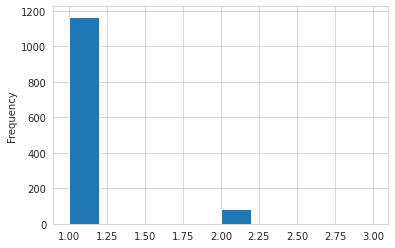

In [ ]:
# 청력 1 = 정상, 2  = 질환의심, 3 = 측정불가
df_new['청력(좌)'].plot.hist()

In [ ]:
# 간단하게 그림을 그릴 수 있는 mglearn 라이브러리 사용
!pip install mglearn
!pip install --upgrade joblib==1.1.0
import mglearn

%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns           
import matplotlib.pyplot as plt 
import matplotlib as mpl 
import matplotlib.font_manager as fm  

# 한글 폰트 설치
!apt-get update -qq
!apt-get install fonts-nanum* -qq

path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf' 
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)

fm._rebuild()
mpl.rcParams['axes.unicode_minus'] = False

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
NanumBarunGothic


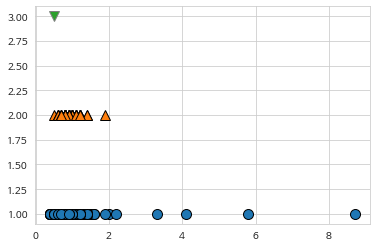

In [ ]:
mglearn.discrete_scatter(df_new['혈청크레아티닌'], df_new['청력(좌)'], df_new['청력(좌)'])

In [ ]:
# 청력(좌) = 3(측정불가)인 값 삭제
df_new = df_new.drop(index = df_new[df_new['청력(좌)'] == 3].index)

In [ ]:
df_new['청력(좌)'].value_counts()

1    1166
2      82
Name: 청력(좌), dtype: int64

In [ ]:
df_new.describe()

,성별,연령대코드(5세단위),시력(좌),시력(우),청력(좌),수축기혈압,이완기혈압,식전혈당(공복혈당),총콜레스테롤,트리글리세라이드,HDL콜레스테롤,LDL콜레스테롤,혈색소,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연,음주
count,1248.000000,1248.000000,1248.000000,1248.000000,1248.000000,1248.000000,1248.000000,1248.000000,1248.000000,1248.000000,1248.000000,1248.000000,1248.000000,1248.000000,1248.000000,1248.00000,1248.000000,1248.000000,1248.000000,1248.000000
mean,0.542468,11.641026,0.926282,0.905529,1.065705,122.723558,76.000000,103.350962,201.492788,126.107372,55.861378,120.500000,14.250000,1.110577,0.881410,26.84375,26.653045,35.443109,0.585737,0.641827
std,0.498393,2.173910,0.652365,0.476027,0.247865,14.467163,9.693292,23.201020,41.274930,69.333924,14.000430,37.619651,1.538576,0.503986,0.355988,13.91406,23.391970,35.986052,0.774921,0.479656
min,0.000000,9.000000,0.100000,0.100000,1.000000,80.000000,50.000000,61.000000,70.000000,20.000000,26.000000,19.000000,6.500000,1.000000,0.400000,8.00000,2.000000,3.000000,0.000000,0.000000
25%,0.000000,10.000000,0.700000,0.700000,1.000000,112.000000,70.000000,91.000000,172.750000,76.000000,45.000000,95.000000,13.300000,1.000000,0.700000,20.00000,16.000000,16.750000,0.000000,0.000000
50%,1.000000,12.000000,0.900000,0.900000,1.000000,122.000000,76.000000,98.000000,200.000000,110.500000,54.000000,120.000000,14.300000,1.000000,0.900000,24.00000,21.000000,24.000000,0.000000,1.000000
75%,1.000000,13.000000,1.000000,1.000000,1.000000,132.250000,82.000000,108.000000,228.000000,155.250000,64.000000,146.000000,15.400000,1.000000,1.000000,29.00000,31.000000,39.000000,1.000000,1.000000
max,1.000000,18.000000,9.900000,9.900000,2.000000,176.000000,130.000000,314.000000,355.000000,399.000000,119.000000,251.000000,18.100000,6.000000,8.700000,265.00000,477.000000,445.000000,2.000000,1.000000


In [ ]:
df_new.info()
# 총 1248개의 데이터

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1248 entries, 6 to 9974
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   성별           1248 non-null   int64  
 1   연령대코드(5세단위)  1248 non-null   int64  
 2   시력(좌)        1248 non-null   float64
 3   시력(우)        1248 non-null   float64
 4   청력(좌)        1248 non-null   int64  
 5   수축기혈압        1248 non-null   float64
 6   이완기혈압        1248 non-null   float64
 7   식전혈당(공복혈당)   1248 non-null   float64
 8   총콜레스테롤       1248 non-null   float64
 9   트리글리세라이드     1248 non-null   float64
 10  HDL콜레스테롤     1248 non-null   float64
 11  LDL콜레스테롤     1248 non-null   float64
 12  혈색소          1248 non-null   float64
 13  요단백          1248 non-null   float64
 14  혈청크레아티닌      1248 non-null   float64
 15  (혈청지오티)AST   1248 non-null   float64
 16  (혈청지오티)ALT   1248 non-null   float64
 17  감마지티피        1248 non-null   float64
 18  흡연           1248 non-null   int64  
 19  음주    

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

X = df_new.drop(['청력(좌)'], axis = 1)  # 19개 변수
y = df_new['청력(좌)']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, stratify = y, random_state = 42)

tree = DecisionTreeClassifier(random_state = 0)
tree.fit(X_train, y_train)
print("학습용 데이터 정확도: {:.3f}".format(tree.score(X_train, y_train)))
print("시험용 데이터 정확도: {:.3f}".format(tree.score(X_test, y_test)))

학습용 데이터 정확도: 1.000
시험용 데이터 정확도: 0.881


In [ ]:
# 과적합 낮추기 위해 max_depth 적용
tree = DecisionTreeClassifier(max_depth = 4, random_state = 0)
tree.fit(X_train, y_train)

print("학습용 데이터 정확도: {:.3f}".format(tree.score(X_train, y_train)))
print("시험용 데이터 정확도: {:.3f}".format(tree.score(X_test, y_test))) # 정확도 증가함

학습용 데이터 정확도: 0.956
시험용 데이터 정확도: 0.910


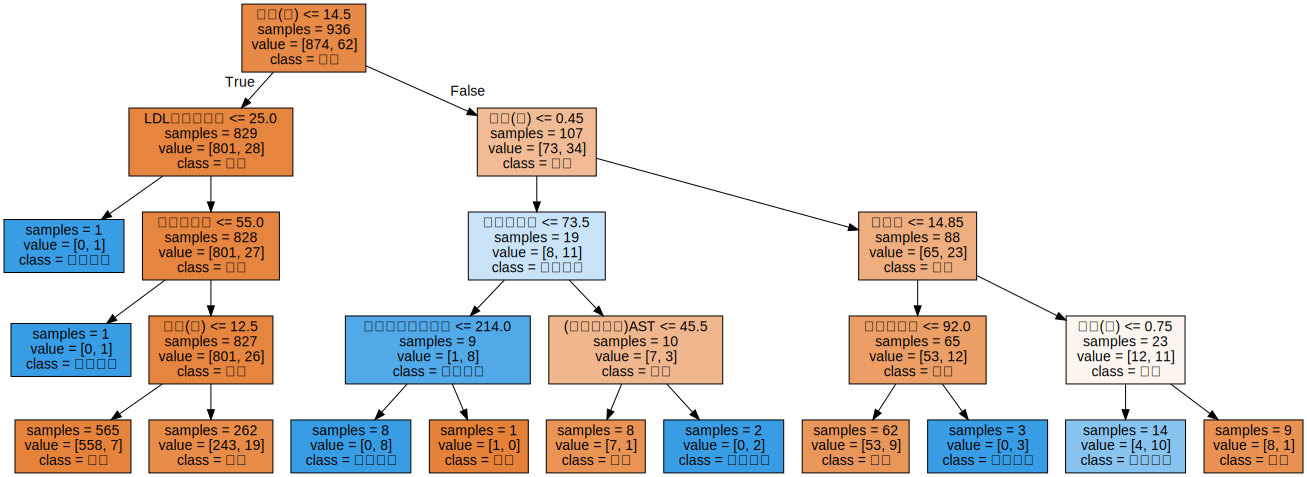

In [ ]:
# graphviz 라이브러리를 이용하여 의사결정나무 그리기 
from sklearn.tree import export_graphviz
import graphviz

export_graphviz(tree, out_file = "tree.dot", class_names = [ "정상", "질환의심"],
                feature_names = df_new.columns[1:], impurity = False, filled = True)

with open("tree.dot") as f:
    dot_graph = f.read()

display(graphviz.Source(dot_graph))

In [ ]:
# 변수의 중요도 구하기
result = tree.feature_importances_
print("변수의 중요도:\n", result)

변수의 중요도:
 [0.         0.39394227 0.09471475 0.07489586 0.         0.22195964
 0.         0.         0.04224121 0.         0.04441902 0.06961359
 0.         0.         0.05821366 0.         0.         0.
 0.        ]


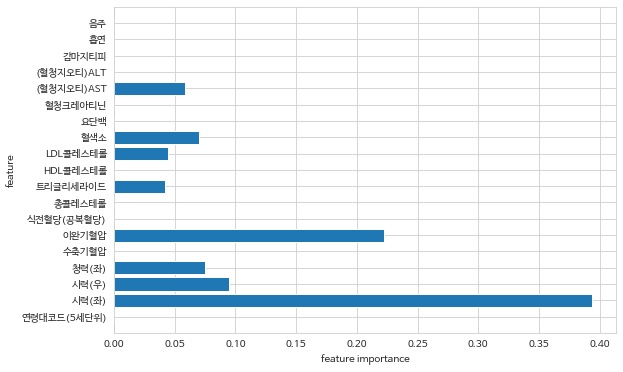

In [ ]:
# 변수의 중요도 시각화
def plot_feature_importances_df_new(model):
    plt.rcParams["figure.figsize"] = (9,6)
    n_features = len(df_new.columns[1:])  # 30개 
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), df_new.columns[1:])
    plt.xlabel("feature importance")
    plt.ylabel("feature")
    plt.ylim(-1, n_features) #Y 축 범위 지정 (-1 ~ 30)

plot_feature_importances_df_new(tree)

청력의 변수로 이완기혈압, 혈색소, LDL콜레스테롤, (혈청지오티)AST, 혈청크레아티닌, 요단백 등이 작용할 수 있다는 것을 알 수 있다.

## 2-2. 랜덤 포레스트

- 의사결정나무를 '랜덤하게' 여러가지로 만들고 이들의 평균을 취하는 방법으로 과적합 문제를 완화시킬 수 있다. 
- 랜덤한 속성을 찾는 방법으로 샘플을 임의로 취하거나 변수(feature)를 임의로 취한다.
- 평균을 구할 전체 나무의 숫자를 정해준다. (n_estimators)
- 샘플 데이터를 랜덤하게 취하기 위해서 부트스트랩 (Bootstrapping) 샘플링을 한다. (같은 수의 샘플을 취하되 중복 샘플링을 허용하는 방법). 샘플수가 100개면 한번도 샘플링 되지 않는 샘플수가 약 36%정도 된다.
- 몇 개의 변수(feature)를 사용할지도 지정한다. (max_features)
- 변수를 선택하는 작업은 각 노드에서 반복되므로 노드마다 "랜덤하게" 다른 변수를 사용하게 된다.
- 분류의 경우는 확률을 고려한 약한 투표를 하고 (대표값 하나만 투표하지 않고 여러 가능성의 가중평균을 구함), 회귀분석의 경우에는 앙상블의 평균치를 구한다.

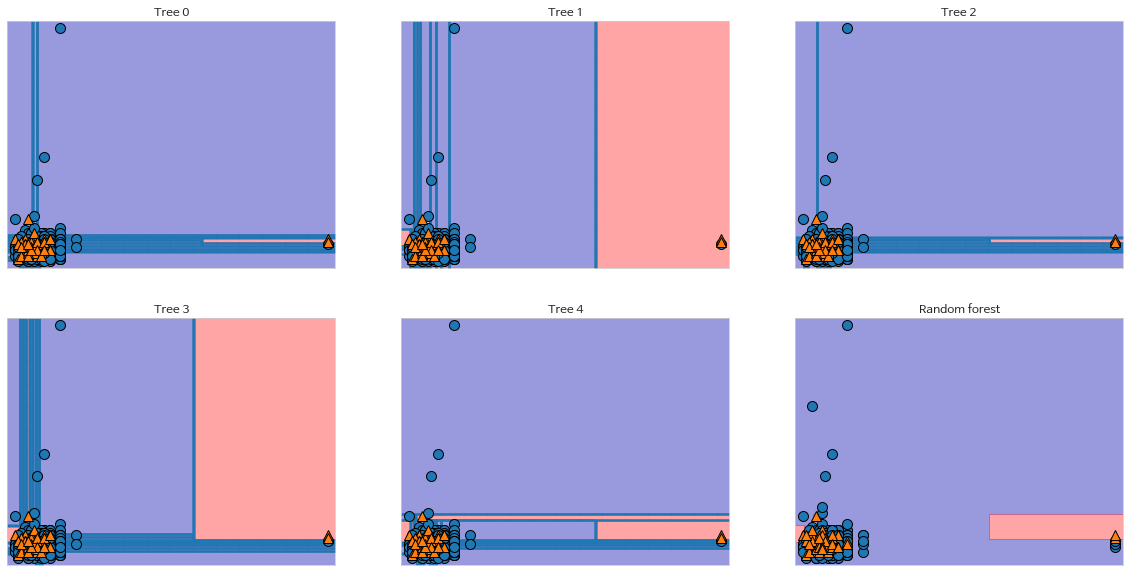

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# 예시 : 시력(좌), 혈청크레아티닌 변수만 이용하여  만든 5개의 나무 (n_estimators = 5, 실제는 수백개의 트리를 만든다)
forest = RandomForestClassifier(n_estimators = 5, random_state = 2)
forest.fit(X_train[['시력(좌)', '혈청크레아티닌']], y_train)

fig, axes = plt.subplots(2, 3, figsize = (20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title("Tree {}".format(i))
    mglearn.plots.plot_tree_partition(X_train[['시력(좌)', '혈청크레아티닌']].values, y_train, tree, ax=ax)
    
mglearn.plots.plot_2d_separator(forest, X_train[['시력(좌)', '혈청크레아티닌']].values, fill=True, ax=axes[-1, -1], alpha=.4)
axes[-1, -1].set_title("Random forest")
mglearn.discrete_scatter(X['시력(좌)'], X['혈청크레아티닌'], y)
plt.show()
# 시력(좌) : 실명은 9.9로 표기하였기 때문에 범위를 벗어나는 큰 데이터 존재
# 혈청크레아티닌 : 정상치는 0.8~1.7mg/dL, describe 함수의 max = 8.7이므로 이상치 존재함

In [ ]:
# 30개 변수를 모두 이용하여 100개의 나무 생성 (정확도가 높아짐)
forest = RandomForestClassifier(n_estimators = 100, random_state = 0)
forest.fit(X_train, y_train)

print("학습용 데이터 세트 정확도: {:.3f}".format(forest.score(X_train, y_train)))
print("시험용 데이터 세트 정확도: {:.3f}".format(forest.score(X_test, y_test)))

학습용 데이터 세트 정확도: 1.000
시험용 데이터 세트 정확도: 0.933


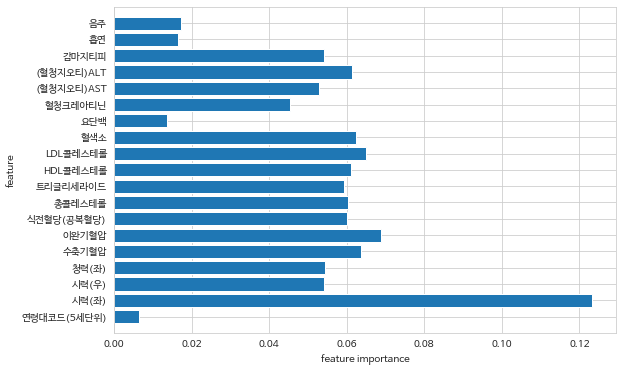

In [ ]:
# 단일 의사결정나무의 경우보다 많은 변수(feature)들이 사용됨
plot_feature_importances_df_new(forest)

## 2-3. 그래디언트 부스팅

- 랜덤한 방식으로 트리의 앙상블을 구하는 것이 아니라 이전의 트리의 성능을 단계적으로 보완하여 오차를 줄이는 방식으로 나무를 생성한다. 
- 보통 1~5 정도의 깊지 않은 나무 (약한 학습기, weak learner)를 사용함으로써 학습 속도가 빠르다. 
- 이전 나무의 오차를 얼마나 강하게 보정할 것인지를 제어하는 학습속도(learning rate)를 미세하게 조정해주어야 한다.
- 가장 성능이 좋은 알고리즘으로 분류 및 예측에 모두 사용된다.

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
# 기본값은 max_depth= 3, n_estimators=100, learning_rate = 0.1

gbrt = GradientBoostingClassifier(random_state = 0)
gbrt.fit(X_train, y_train)

GradientBoostingClassifier(random_state=0)

In [ ]:
print("학습용 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
print("시험용 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_test, y_test)))

학습용 데이터 세트 정확도: 0.980
시험용 데이터 세트 정확도: 0.917


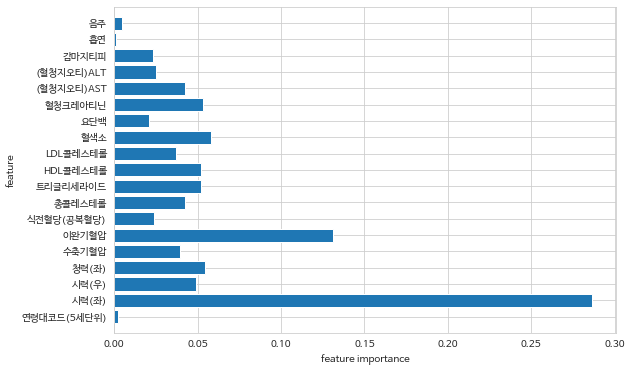

In [ ]:
plot_feature_importances_df_new(gbrt)

In [ ]:
# 나무 깊이 제한 : 시험 데이터 정확도 증가
gbrt = GradientBoostingClassifier(random_state=0, max_depth = 2)
gbrt.fit(X_train, y_train)

print("학습 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
print("시험용 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_test, y_test)))

학습 데이터 세트 정확도: 0.964
시험용 데이터 세트 정확도: 0.923


In [ ]:
# 학습률 감소 : 시험 데이터 정확도 증가
gbrt = GradientBoostingClassifier(random_state = 0, learning_rate = 0.01)
gbrt.fit(X_train, y_train)

print("학습 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
print("시험용 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_test, y_test)))

학습 데이터 세트 정확도: 0.937
시험용 데이터 세트 정확도: 0.929


# 3. 모델 평가 - 교차 검증 

In [ ]:
from sklearn.model_selection import cross_val_score

# 교차 검증을 10번 수행하여 10번의 교차 검증 평균 정확도를 비교 (10-fold cross validation)

dt_scores = cross_val_score(tree, X_train, y_train, cv = 10, scoring='accuracy')  
rf_scores = cross_val_score(forest, X_train, y_train, cv = 10, scoring='accuracy')
gbrt_scores = cross_val_score(gbrt, X_train, y_train, cv=10, scoring='accuracy')

print("Accuracy")
print("Decision tree: ", dt_scores) 
print("Random forest: ", rf_scores) 
print("Gradient boosting: ", gbrt_scores) 

print("Accuracy mean")
print("Decision tree :{:.3f}".format(dt_scores.mean())) 
print("Random forest :{:.3f}".format(rf_scores.mean())) # 평균 정확도가 가장 좋음
print("Gradient boosting :{:.3f}".format(gbrt_scores.mean())) 

Accuracy
Decision tree:  [0.87234043 0.86170213 0.85106383 0.82978723 0.87234043 0.86170213
 0.90322581 0.86021505 0.82795699 0.87096774]
Random forest:  [0.93617021 0.93617021 0.92553191 0.93617021 0.92553191 0.93617021
 0.93548387 0.93548387 0.92473118 0.93548387]
Gradient boosting:  [0.93617021 0.92553191 0.93617021 0.93617021 0.91489362 0.91489362
 0.93548387 0.92473118 0.92473118 0.93548387]
Accuracy mean
Decision tree :0.861
Random forest :0.933
Gradient boosting :0.928


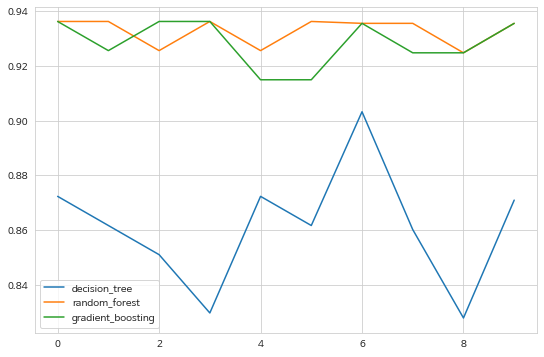

In [ ]:
cv_list = [    
            ['decision_tree',dt_scores],
            ['random_forest',rf_scores],
            ['gradient_boosting',gbrt_scores]
          ]
df = pd.DataFrame.from_dict(dict(cv_list))
df.plot()
# random forest 정확도가 가장 좋음

# 4. 인사이트

1. 의사결정나무, 그래디언트 부스팅 기법보다 랜덤포레스트의 정확도가 더 높다.
2. 다만, 시력과 혈청크레아티닌 변수를 지정한 랜덤포레스트 예시에서 볼 수 있듯이 이상치에 대한 제거가 선행된다면 더 뚜렷한 분류 모델이 될 수 있다.
2. 건강검진 데이터인 청력에 다른 신장 기능 결과인 (혈청지오티)AST, 혈청크레아티닌, 요단백, 감마지티피, 트리글리세라이드 등이 영향을 줄 수 있다는 것을 알 수 있다. 이에 대해 조사를 해보니, 만성신부전 환자의 청력 감소로 난청이 발생할 수 있다는 사실을 알게 되었다. 
(관련 자료 = https://www.ekjm.org/upload/42800830.pdf)